**Programming Assignment 1**
# **EXPLORATORY DATA ANALYSIS**
By Obis, Aj Dave A. and Tuatis, Juan Francis C.


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data of spotify csv file to python
spotify_df = pd.read_csv('/content/spotify-2023.csv', encoding = 'latin-1')

# Note: if CSV cannot be find, re-upload the CSV file. Copy the "path" then replace the path from the code.

In [4]:
print(spotify_df.head()) # show the first 5 rows of the dataset

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

## 1. Overview of Dataset
-  How many rows and columns does the dataset contain?

In [ ]:
num_rows = spotify_df.shape[0]
num_columns = spotify_df.shape[1]
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 953
Number of columns: 24




>Answer: The dataset contains 953 rows and 24 columns. This indicates that we are working with 953 tracks, each with 24 items of information.



- What are the data types of each column?

In [ ]:
print(spotify_df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object




> Answer: The data types of each column are either object or int64. This indicates that the data provided are mostly numbers with some object or string types which are relevant such as the track name, artist name, and so on.



- Are there any missing values?

In [ ]:
missing_values = spotify_df.isnull().sum()
print("Missing values: ", + missing_values)

Missing values:  track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64




> Answer: Yes, there are missing values, particularly in the in_shazam_charts and key columns, but they are not significant or may have little impact on our data, thus it is fine.




## 2. Basic Descriptive Statistics
- What are the mean, median, and standard deviation of the "streams" column?

In [ ]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors = 'coerce')
spotify_df['streams'] = spotify_df['streams'].fillna(0)
spotify_df['streams'] = spotify_df['streams'].astype(int)

mean_streams = spotify_df['streams'].mean()
median_streams = spotify_df['streams'].median()
std_dev_streams = spotify_df['streams'].std()

print("Mean: ", mean_streams)
print("Median: ", median_streams)
print("Standard Deviation: ", std_dev_streams)

Mean:  513597931.3137461
Median:  290228626.0
Standard Deviation:  566803887.0588315




> Answer: The statistics for the "streams" column show a right-skewed distribution, with a mean of 513,597,931.31 much higher than the median of 290,228,626.0. This gap suggests that a small number of tracks obtain extremely high stream counts, raising the average, while the majority of tracks have lower streams. Furthermore, the enormous standard deviation of 566,803,887.06 indicates great variability in the data, implying significant changes in stream counts between tracks. Overall, these statistics show that, while many tracks achieve moderate success, a few exceptional hits raise the overall average.



- What is the distribution of "released_year" and "artist_count"? Are there any noticeable trends or outliers?


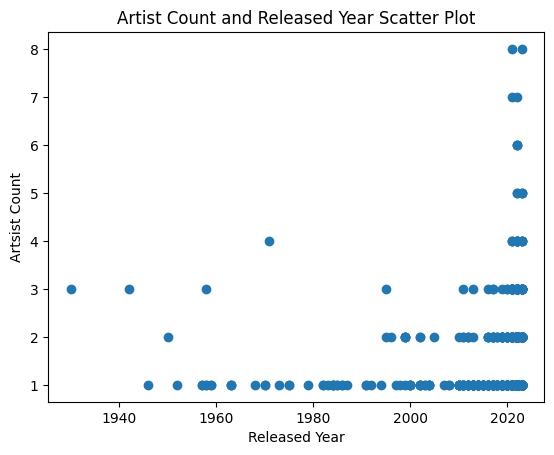

In [10]:
plt.scatter(x = spotify_df['released_year'], y = spotify_df['artist_count'])
plt.xlabel('Released Year')
plt.ylabel('Artsist Count')
plt.title('Artist Count and Released Year Scatter Plot')
plt.show()

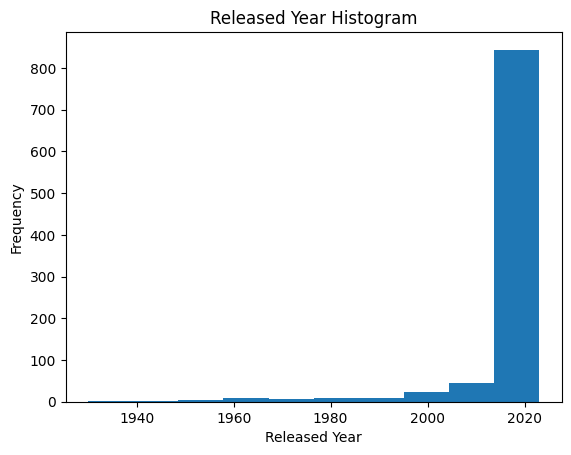

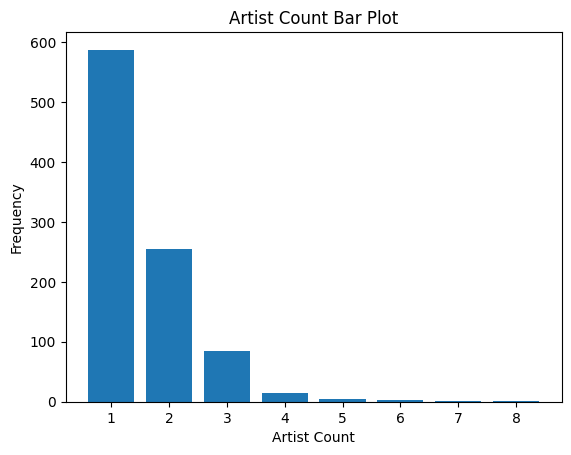

In [13]:
plt.hist(spotify_df['released_year'])
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.title('Released Year Histogram')
plt.show()

artist_count = spotify_df['artist_count'].value_counts()

plt.bar(artist_count.index, artist_count.values)
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.title('Artist Count Bar Plot')
plt.show()

> Answer: Looking at the scatter plot, it shows that more artists start to collaborate in the year 2000. Outliers are also evident in the plot. By looking at the at the released year histogram, we can see that most of the tracks was released in the year 2000s and majority of them are from a single artist as shown in the bar plot.

## 3. Top Performers
- Which track has the highest number of streams? Display the top 5 most streamed tracks.


In [18]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors = 'coerce')
spotify_df['streams'] = spotify_df['streams'].fillna(0)
spotify_df['streams'] = spotify_df['streams'].astype(int)

most_streamed = spotify_df.sort_values(by='streams', ascending = False)
print(most_streamed[['track_name', 'artist(s)_name', 'streams']].head())

                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

        streams  
55   3703895074  
179  3562543890  
86   2887241814  
620  2864791672  
41   2808096550  


> Answer: The track that appears to have the highest number of streams is Blinding Lights from the Weeknd with 3,703,895,074 streams. It shows that most people listened to Blinding Lights from the time it was released until 2023, even surpassing the amount of streams from songs from 1930.

## 4. Temporal Trednds
- Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.


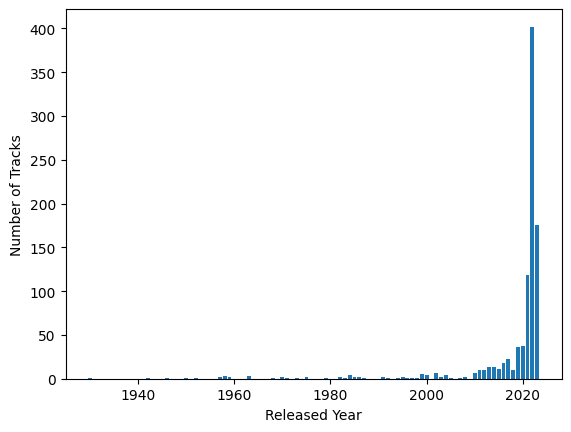

In [20]:
# Add another column for number of tracks released per year

spotify_df['tracks_per_year'] = spotify_df.groupby('released_year')['track_name'].transform('count')

# Check min() and max() to make sure plot is accurate
# spotify_df['tracks_per_year].min()
# spotify_df['tracks_per_year].max()

# Plot the number of tracks released per year

plt.bar(spotify_df['released_year'], spotify_df['tracks_per_year'])
plt.xlabel('Released Year')
plt.ylabel('Number of Tracks')
plt.show()

> Answer: The bar plot reveals a noteanle trend in music releases over time. While the years before 2010 show a relatively stable number of releases, there's a significant increase of released tracks starting around 2010, reaching its peak in 2022. This upward trend could be attributed to a combination of factors such as the rise of streaming platmorms, increased accessibiliity, and more. But somehow, a decline is observed in 2023.

- Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?


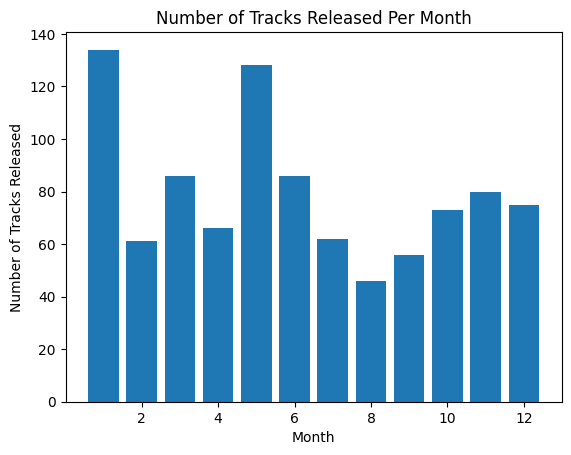

In [ ]:
# Add another coloumn, this time for the number of tracks released every month.

tracks_per_month = spotify_df.groupby('released_month')['track_name'].count()
tracks_per_month = tracks_per_month.sort_index()

# Create bar plot
plt.bar(tracks_per_month.index, tracks_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released Per Month')
plt.show()

> Answer: Looking at the graph, there is no strong pattern evident in the number of tracks released per month. Partifcularly, January and May shows the most number of releases.

## 5. Genre and Music Characteristics

*   Examine the correlation between streams and musical attributes like bpm,...



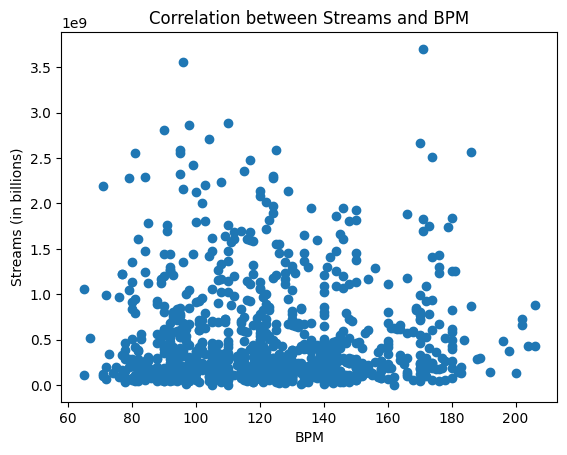

Correlation coefficient: -0.0020107392431485114


In [ ]:
# Display the correlation using scatter plot
plt.scatter(spotify_df['bpm'], spotify_df['streams'])
plt.xlabel('BPM')
plt.ylabel('Streams (in billions)')
plt.title('Correlation between Streams and BPM')
plt.show()

# Correlation Coefficient
correlation = spotify_df['bpm'].corr(spotify_df['streams'])
print(f"Correlation coefficient: {correlation}")



*   danceability_%,...



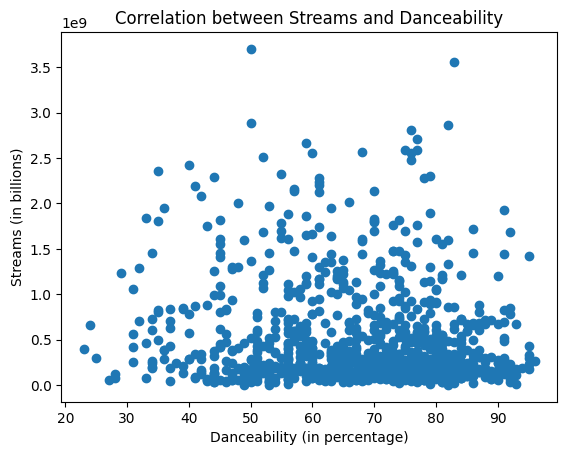

Correlation coefficient: -0.10445104424167971


In [ ]:
plt.scatter(spotify_df['danceability_%'], spotify_df['streams'])
plt.xlabel('Danceability (in percentage)')
plt.ylabel('Streams (in billions)')
plt.title('Correlation between Streams and Danceability')
plt.show()

# Correlation Coefficient
correlation = spotify_df['danceability_%'].corr(spotify_df['streams'])
print(f"Correlation coefficient: {correlation}")



*    and energy_%...



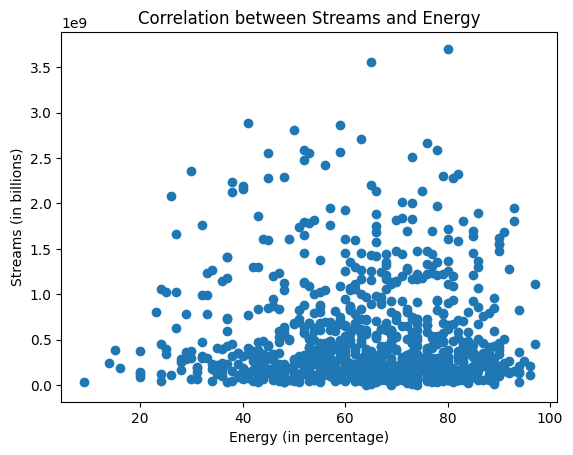

Correlation coefficient: -0.026310907904856313


In [ ]:
plt.scatter(spotify_df['energy_%'], spotify_df['streams'])
plt.xlabel('Energy (in percentage)')
plt.ylabel('Streams (in billions)')
plt.title('Correlation between Streams and Energy')
plt.show()

# Correlation Coefficient
correlation = spotify_df['energy_%'].corr(spotify_df['streams'])
print(f"Correlation coefficient: {correlation}")

 * Which attributes seem to influence streams the most?





> Answer: It's hard to say which attribute seem to influence the number of streams the most since they have no clear representation of correlation looking at the scatter plots. Looking at the correlation coeffecient almost all of them has no correlation with the number of streams since they are all close to 0. It's most likely that energy of a song does not affect number of streams



* Is there a correlation between danceability_% and energy_%?...


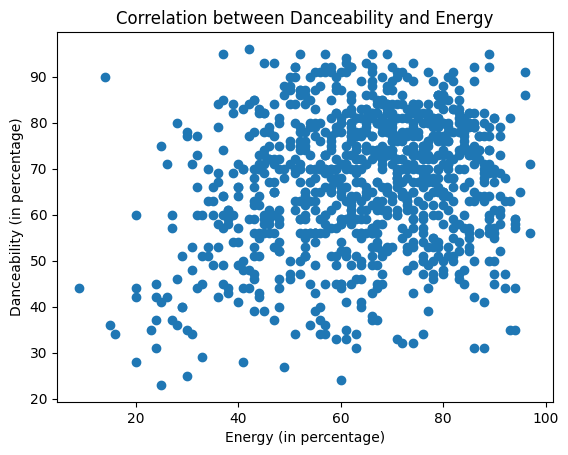

Correlation coefficient: 0.19809484837625718


In [ ]:
plt.scatter(spotify_df['energy_%'], spotify_df['danceability_%'])
plt.xlabel('Energy (in percentage)')
plt.ylabel('Danceability (in percentage)')
plt.title('Correlation between Danceability and Energy')
plt.show()

# Correlation Coefficient
correlation = spotify_df['energy_%'].corr(spotify_df['danceability_%'])
print(f"Correlation coefficient: {correlation}")

> Answer: Yes, somehow it seems that there is a correlation between danceability and energy. Looking at the scatterplot, it shows that the higher the energy, the higher the danceability of the song which makes sense since energy and danceabilty comes together.

* How about valence_% and
acousticness_%?

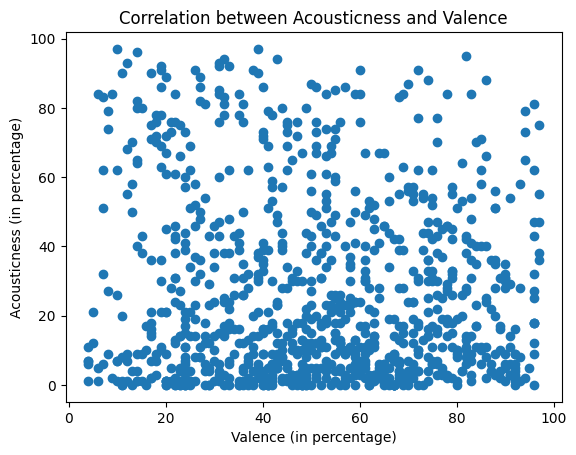

Correlation coefficient: -0.08190727483082759


In [ ]:
plt.scatter(spotify_df['valence_%'], spotify_df['acousticness_%'])
plt.xlabel('Valence (in percentage)')
plt.ylabel('Acousticness (in percentage)')
plt.title('Correlation between Acousticness and Valence')
plt.show()

# Correlation Coefficient
correlation = spotify_df['valence_%'].corr(spotify_df['acousticness_%'])
print(f"Correlation coefficient: {correlation}")

> Answer: There is no significant evident correlation between acousticness and valence. Sometimes more positive songs are tend to be acoustic but it is not always the case as shown in the plot.

## 6. Platform Populatiry

* How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare?...

In [ ]:
spotify_playlists_count = spotify_df['in_spotify_playlists'].sum()
spotify_charts_count = spotify_df['in_spotify_charts'].sum()
apple_playlists_count = spotify_df['in_apple_playlists'].sum()

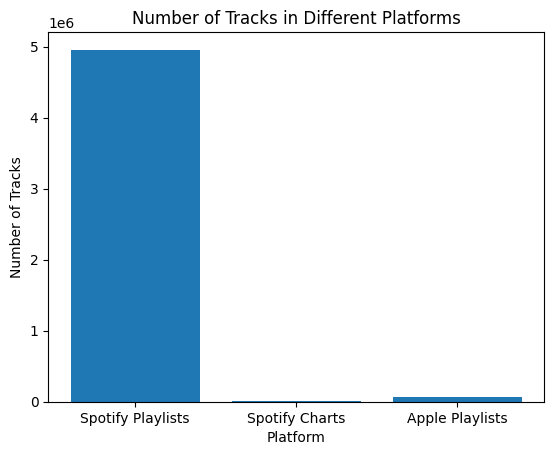

In [ ]:
spotify_playlists_count = spotify_df['in_spotify_playlists'].sum()
spotify_charts_count = spotify_df['in_spotify_charts'].sum()
apple_playlists_count = spotify_df['in_apple_playlists'].sum()

categories = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
counts = [spotify_playlists_count, spotify_charts_count, apple_playlists_count]

plt.bar(categories, counts)
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks in Different Platforms')
plt.show()

* Which platform seems to favor the most popular tracks?

> Asnwer: The platform the seems to favor the most popular tracks is Spotify. Just by looking at the number of tracks present in spotify playlists, we can see that it is most used.

## 7. Advanced Analysis

* Based on the streams data, can you identify any patterns among tracks with the same key...

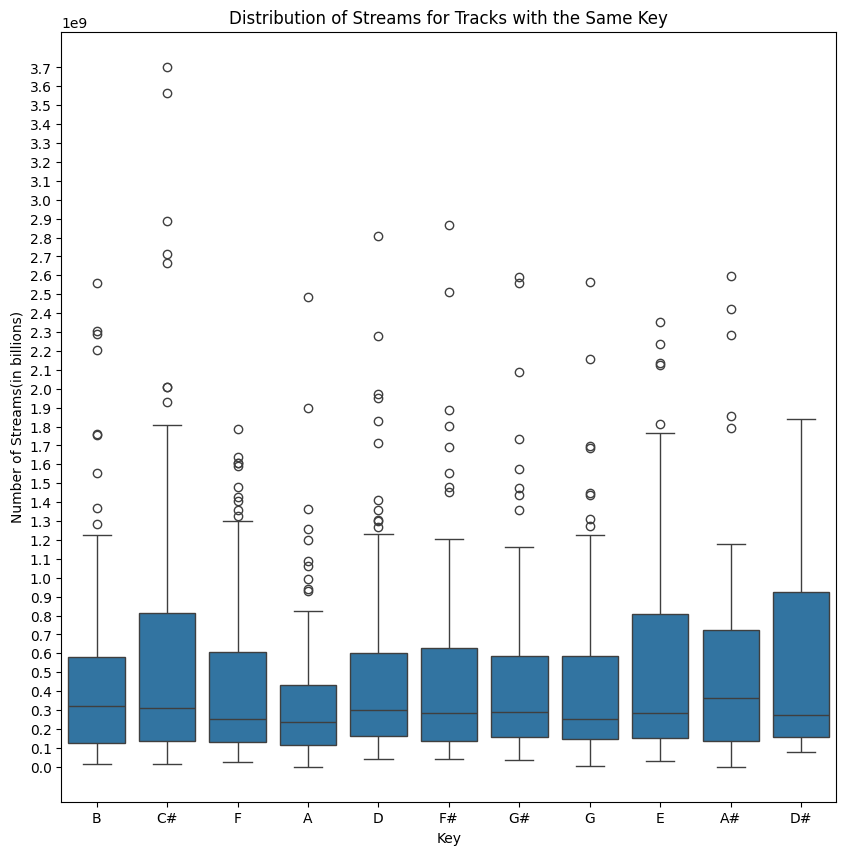

     count          mean           std         min           25%          50%  \
key                                                                             
A     75.0  4.033902e+08  4.460859e+08         0.0  1.158481e+08  236060709.0   
A#    57.0  5.524754e+08  6.020724e+08      2762.0  1.337537e+08  363467642.0   
B     81.0  5.193480e+08  5.910144e+08  11956641.0  1.274090e+08  322336177.0   
C#   120.0  6.042802e+08  7.258314e+08  14780425.0  1.338508e+08  309573860.0   
D     81.0  5.295256e+08  5.739496e+08  39228929.0  1.628871e+08  298063749.0   
D#    33.0  5.530365e+08  5.629377e+08  76831876.0  1.579907e+08  273194684.0   
E     62.0  5.774972e+08  6.144343e+08  29562220.0  1.500457e+08  284811322.5   
F     89.0  4.684464e+08  4.712031e+08  22581161.0  1.304194e+08  255120451.0   
F#    73.0  5.223632e+08  5.845151e+08  39666245.0  1.383344e+08  283359161.0   
G     96.0  4.525994e+08  4.911759e+08   1365184.0  1.456330e+08  251810759.0   
G#    91.0  4.769119e+08  5.

In [33]:
# Create a box plot
plt.figure(figsize=(10, 10))
sns.boxplot(x='key', y='streams', data=spotify_df)

# Limit y-axis ticks for better representation
max_streams = int(spotify_df['streams'].max())
interval = 100000000  # Adjust the interval as needed
plt.yticks(range(0, max_streams + 1, interval))

# Show plot
plt.xlabel("Key")
plt.ylabel("Number of Streams(in billions)")
plt.title("Distribution of Streams for Tracks with the Same Key")
plt.show()

# Show numerical summary
print(spotify_df.groupby('key')['streams'].describe())

> Answer: The box plot shows that tracks in C# and D# tend to have higher median streams, indicating they generally perform better. C#, in particular, stands out with a track reaching over 3.7 billion streams. These keys also display a wide range in stream counts, suggesting more variability and a higher likelihood of hits which also makes it popular in artists. In contrast, keys like A and B have lower medians and a narrower spread, indicating more consistent but average performance. Overall, C#, D#, and D appear to produce tracks with greater potential for high success, while A and B see more moderate outcomes.

* or mode (Major vs. Minor)?

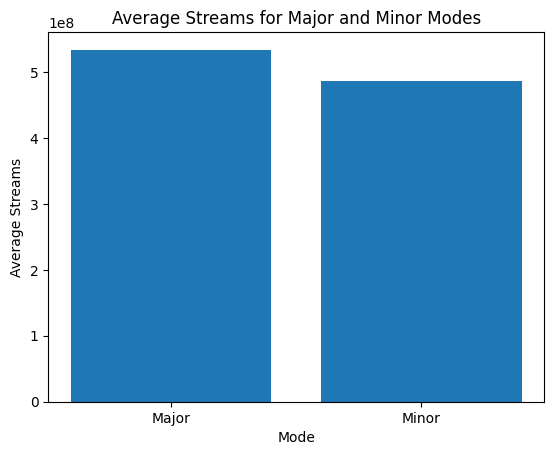

In [35]:
# Using bar plot
mode_streams = spotify_df.groupby('mode')['streams'].mean()
plt.bar(mode_streams.index, mode_streams.values)
plt.xlabel("Mode")
plt.ylabel("Average Streams")
plt.title("Average Streams for Major and Minor Modes")
plt.show()

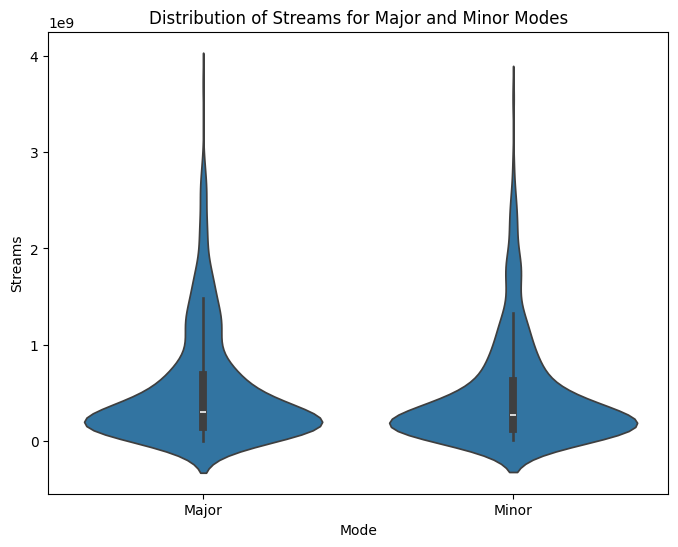

In [36]:
# Using violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='mode', y='streams', data=spotify_df)
plt.xlabel("Mode")
plt.ylabel("Streams")
plt.title("Distribution of Streams for Major and Minor Modes")
plt.show()

> Answer: Looking at the bar graph comparing the average streams of songs in major and minor modes shows that those in major tends to have more streams than minor mode. This suggests a potential preference among listeners for the brighter, more uplifting qualities often associated with major keys. However other factors are still needed to be considered such as popular genres like pop and dance that are often in major keys. Moreover, looking at the violin plot, the tracks with major modes tend to have more favorable outcome than the minor ones.

* Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

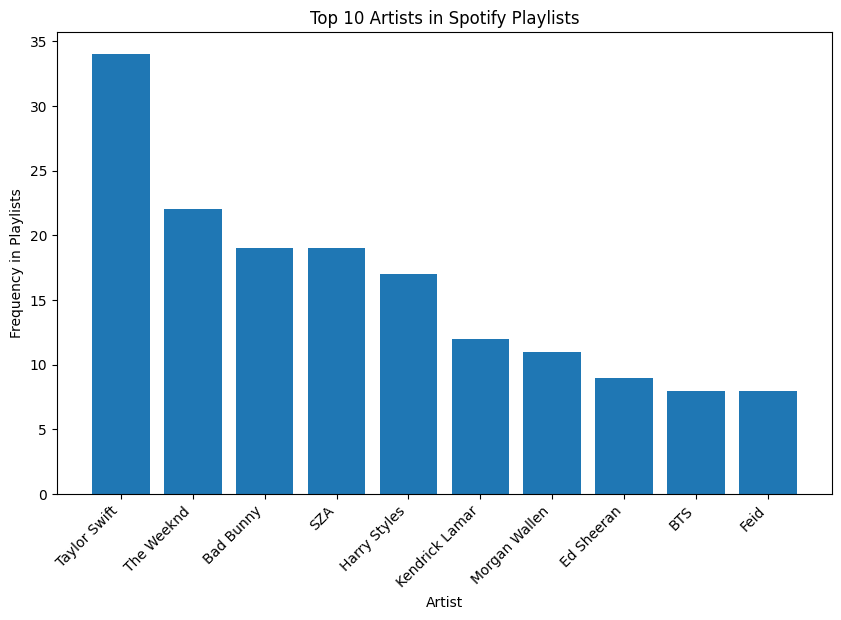

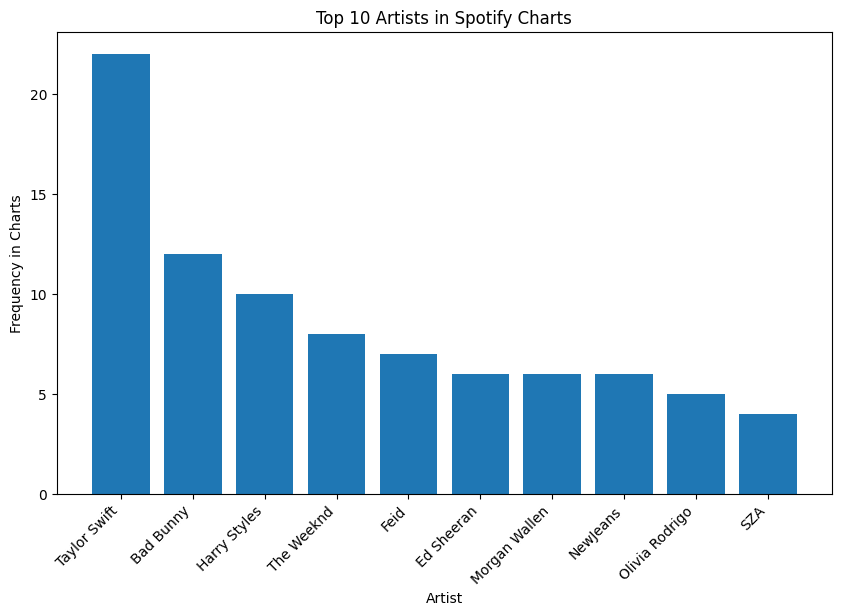

Common artists in top 10 of playlists and charts (highest to lowest frequency):
Taylor Swift: 56
Bad Bunny: 31
The Weeknd: 30
Harry Styles: 27
SZA: 23
Morgan Wallen: 17
Ed Sheeran: 15
Feid: 15
Kendrick Lamar: 12
BTS: 8
NewJeans: 6
Olivia Rodrigo: 5


In [38]:
# Calculate artist frequency in playlists
artist_in_playlists = spotify_df[spotify_df['in_spotify_playlists'] > 0]['artist(s)_name'].value_counts()

# Calculate artist frequency in charts
artist_in_charts = spotify_df[spotify_df['in_spotify_charts'] > 0]['artist(s)_name'].value_counts()

# Identify top artists in playlists
top_playlist_artists = artist_in_playlists.head(10)

# Identify top artists in charts
top_chart_artists = artist_in_charts.head(10)

# Visualize top artists in playlists
plt.figure(figsize=(10, 6))
plt.bar(top_playlist_artists.index, top_playlist_artists.values)
plt.xlabel("Artist")
plt.ylabel("Frequency in Playlists")
plt.title("Top 10 Artists in Spotify Playlists")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize top artists in charts
plt.figure(figsize=(10, 6))
plt.bar(top_chart_artists.index, top_chart_artists.values)
plt.xlabel("Artist")
plt.ylabel("Frequency in Charts")
plt.title("Top 10 Artists in Spotify Charts")
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
# Combine top artists with tracks present playlists and charts
combined_artists = pd.concat([top_playlist_artists, top_chart_artists])

# Calculate total frequency for common artists
common_artists = combined_artists.groupby(combined_artists.index).sum().sort_values(ascending=False)

# Display common artists from highest to lowest frequency
print("Common artists in top 10 of playlists and charts (highest to lowest frequency):")
for artist, frequency in common_artists.items():
    print(f"{artist}: {frequency}")

Common artists in top 10 of playlists and charts (highest to lowest frequency):
Taylor Swift: 56
Bad Bunny: 31
The Weeknd: 30
Harry Styles: 27
SZA: 23
Morgan Wallen: 17
Ed Sheeran: 15
Feid: 15
Kendrick Lamar: 12
BTS: 8
NewJeans: 6
Olivia Rodrigo: 5


> Answer: Looking at the analysis of the top artists who appear in more playlists or charts presented in the graph, the majority of the artists are Taylor Swift, who is ranked first, followed by the Weeknd, Bad Bunny, SZA, Harry Styles, and so on, indicating that the artists are very popular and are most likely listened to. Looking at the charts, it appears that Taylor Swift is also at number one, but Bad Bunny and Harry Styles have surpassed the Weeknd, among other variations. Furthermore, combining the frequency of artists in both playlists and rankings reveals who is actually popular, with Taylor Swift, Bad Bunny, and The Weeknd at the top three.

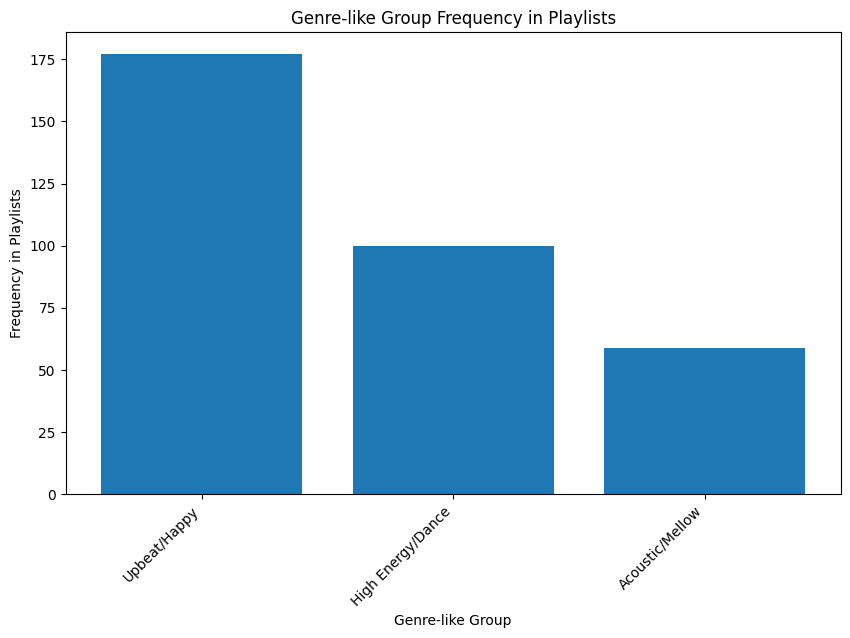

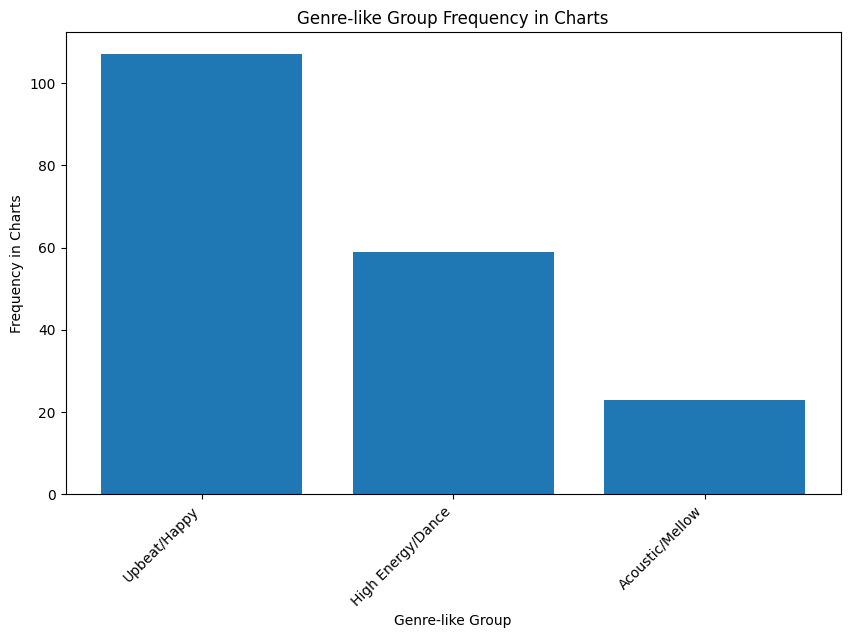

In [45]:
# Define genre-like groups based on features (example)
spotify_df['genre_group'] = 'Unknown'
spotify_df.loc[(spotify_df['energy_%'] > 70) & (spotify_df['danceability_%'] > 70), 'genre_group'] = 'High Energy/Dance'
spotify_df.loc[(spotify_df['acousticness_%'] > 60) & (spotify_df['energy_%'] < 40), 'genre_group'] = 'Acoustic/Mellow'
spotify_df.loc[(spotify_df['valence_%'] > 70) & (spotify_df['energy_%'] > 60), 'genre_group'] = 'Upbeat/Happy'

# Calculate frequency in playlists (excluding Unknown)
playlist_genre_counts = spotify_df[spotify_df['in_spotify_playlists'] > 0]['genre_group'].value_counts()
playlist_genre_counts = playlist_genre_counts[playlist_genre_counts.index != 'Unknown']

# Calculate frequency in charts (excluding Unknown)
chart_genre_counts = spotify_df[spotify_df['in_spotify_charts'] > 0]['genre_group'].value_counts()
chart_genre_counts = chart_genre_counts[chart_genre_counts.index != 'Unknown']

# Visualize genre-like group distribution in playlists
plt.figure(figsize=(10, 6))
plt.bar(playlist_genre_counts.index, playlist_genre_counts.values)
plt.xlabel("Genre-like Group")
plt.ylabel("Frequency in Playlists")
plt.title("Genre-like Group Frequency in Playlists")
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize genre-like group distribution in charts
plt.figure(figsize=(10, 6))
plt.bar(chart_genre_counts.index, chart_genre_counts.values)
plt.xlabel("Genre-like Group")
plt.ylabel("Frequency in Charts")
plt.title("Genre-like Group Frequency in Charts")
plt.xticks(rotation=45, ha='right')
plt.show()

Answer: Because there is no specific genre available in the data set, we created a genre group by combining tracks with nearly identical features such as danceability, energy, and so on, and then we looked at which group is most likely to appear in playlists and charts, with upbeat/happy as the first, high energy/dance as the second, and acoustic/mellow as the last.

##Conclusions and Recommendations
The analysis reveals that popular tracks are largely influenced by artist recognition and external factors such as marketing, rather than simply musical attributes. Artists such as Taylor Swift, The Weeknd, and Bad Bunny dominate playlists and charts, showcasing the importance of established names. Songs that are high-energy and danceable tend to be popular. Still, additional information, such as music genre, would be beneficial for more reliable data analysis. Considering all other platforms will enhance its accuracy. Although each individual has their own preference when it comes to music, the numbers say it all and people tend to pay close attention to popular music.